**K-State Honor Code "On my honor, as a student, I have neither given nor received unauthorized aid on this ascademic work"**

# Homework 2 Sentiment Analysis

In [1]:
#Import Library
import re
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import csv
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist, word_tokenize
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [2]:
#Read in the file
review = []
openfile = open('MovieReviewData_HW2.csv', 'r')
positive_words = open('Bing_liu_positive.txt', "r").read().splitlines()
negative_words = open('Bing_liu_negative.txt', "r").read().splitlines()
# openfile = open('Challenge Lab #4 data/sampledata_wordfrequency.csv', 'r', encoding = "ISO-8859-1")
r = csv.reader(openfile)
for i in r:
# get the first column only (ignoring the second column)
    review.append(i)    
openfile.close()

In [3]:
#Clean up
new_texts = []
new_documents = []
remove = ['br', 's']
flat_review = [''.join(ele) for ele in review]
documents = [re.sub("[^a-zA-Z]+", " ", document) for document in flat_review]

for review in documents:
    x = review.split()
    new_documents.append(" ".join(a if a not in remove else '' for a in x))

texts = [[word for word in document.lower().split() ] for document in documents]


## Bing Liu Lexicon

In [4]:
#Analysis
positive_review = []
negative_review = []
neutral_review = []

for sentence in texts:
    positive = 0
    negative = 0
    for word in sentence:
        if word in positive_words:
            positive += 1
        elif word in negative_words:
            negative += 1
    if positive-negative > 0:
            positive_review.append(sentence)
    elif positive-negative == 0:
        neutral_review.append(sentence)
    else:
        negative_review.append(sentence)
print(len(positive_review), ' positive reviews')
print(len(negative_review), ' negative reviews')
print(len(neutral_review), ' neutral reviews')

2628  positive reviews
2082  negative reviews
291  neutral reviews


### Result of Bing Liu Lexicon Sentiment Analysis


a. Number of positive reviews: 2628    
b. Number of negative reviews: 2082    
c. Number of neutural reviews: 291    

## Textblob Sentiment Analysis

In [5]:
#Analysis
positive_count = 0
negative_count = 0
neutral_count  = 0
for row in new_documents:
    pol = TextBlob(row).sentiment.polarity
    sub = TextBlob(row).sentiment.subjectivity
    if pol > 0:
        positive_count += 1
    elif pol == 0:
        neutral_count += 1
    else:
        negative_count += 1
    #print(pol,sub,
          #"Positive" if pol > 0 
          #else "Neutral" if pol == 0 
          #else "Negative")
print("Number of positive reviews: {}".format(positive_count))
print("Number of negative reviews: {}".format(negative_count))
print("Number of neutural reviews: {}".format(neutral_count))

Number of positive reviews: 3815
Number of negative reviews: 1185
Number of neutural reviews: 1


### Result of Bing Liu Lexicon Sentiment Analysis


a. Number of positive reviews: 3815   
b. Number of negative reviews: 1185  
c. Number of neutural reviews: 1  

## vaderSentiment Sentiment Analysis

In [6]:
#Analysis
analyzer = SentimentIntensityAnalyzer()
positive_count = 0
negative_count = 0
neutral_count  = 0

for row in new_documents:
    vsPol = analyzer.polarity_scores(row)
    #print("{:-<65} {}".format(row, str(vsPol)))
    Pol_result = vsPol['compound']
    if Pol_result >= 0.05:
        positive_count += 1
    elif -0.05 < Pol_result < 0.05:
        negative_count += 1
    else:
        neutral_count += 1
print("Number of positive reviews: {}".format(positive_count))
print("Number of negative reviews: {}".format(negative_count))
print("Number of neutural reviews: {}".format(neutral_count))

Number of positive reviews: 3400
Number of negative reviews: 54
Number of neutural reviews: 1547


### Result of vaderSentiment Sentiment Analysis


a. Number of positive reviews: 3400   
b. Number of negative reviews: 51  
c. Number of neutural reviews: 1550  

## Word Frequency Analysis

In [7]:
#Split the reviews
analyzer = SentimentIntensityAnalyzer()
positive_reviews = []
negative_reviews = []
neutral_reviews  = []

for row in new_documents:
    vsPol = analyzer.polarity_scores(row)
    #print("{:-<65} {}".format(row, str(vsPol)))
    Pol_result = vsPol['compound']
    if Pol_result >= 0.05:
        positive_reviews.append(row)
    elif -0.05 < Pol_result < 0.05:
        negative_reviews.append(row)
    else:
        neutral_reviews.append(row)

### Positive Reviews

In [8]:
#Word Frequency 
tokens = str(positive_reviews)
#lowecases
tokens = tokens.lower()
# Remove useless numbers and alphanumerical words
tokens = re.sub("[^a-zA-Z0-9]", " ", tokens)
#tokenization or word split
tokens = word_tokenize(tokens)
more_stopwords = set(('cant', 'aint', 'today', 'food', 'got', 'films', 'film', 'movies', 'movie', 'one', 'like', 'could', 'see', 'also', 'get'))
extra_stoplist = set(stopwords.words('english')) | more_stopwords
#Remove stopwords
tokens = (word for word in tokens if word not in extra_stoplist)
# Filter non-alphanumeric characters from tokens
tokens = (word for word in tokens if word.isalpha())
#remove short words
tokens = (word for word in tokens if len(word) >= 3)

fdist = nltk.FreqDist(tokens)
fdist.most_common(25)

[('good', 2180),
 ('time', 1689),
 ('story', 1675),
 ('well', 1634),
 ('would', 1605),
 ('great', 1571),
 ('really', 1543),
 ('even', 1404),
 ('much', 1362),
 ('first', 1285),
 ('people', 1197),
 ('made', 1118),
 ('best', 1107),
 ('love', 1028),
 ('way', 1026),
 ('make', 1015),
 ('think', 1008),
 ('show', 1003),
 ('characters', 994),
 ('many', 982),
 ('life', 965),
 ('watch', 946),
 ('character', 945),
 ('two', 896),
 ('seen', 864)]

### Positive Word Cloud

(-0.5, 399.5, 199.5, -0.5)

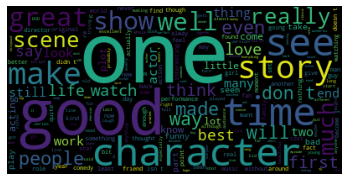

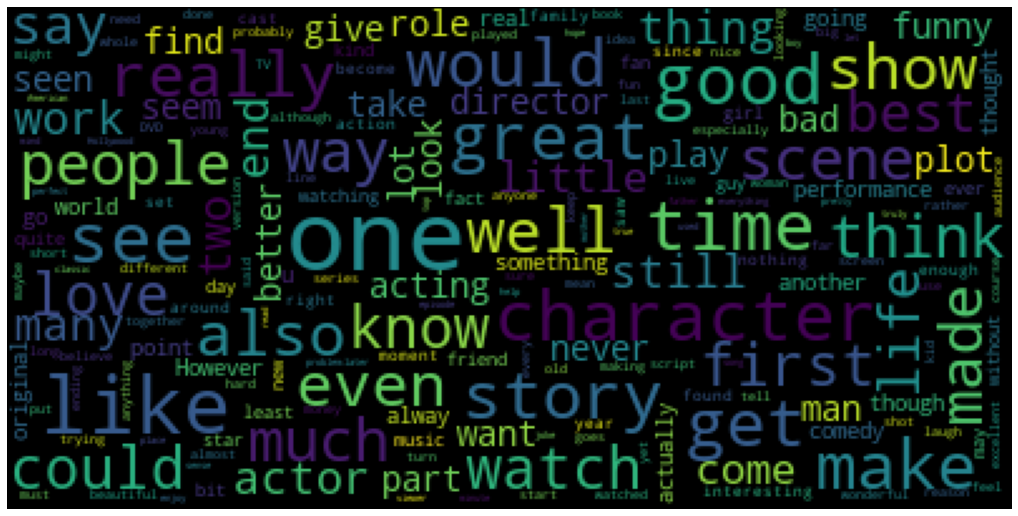

In [9]:
new_positive_reviews = []
more_remove_words_pos = ['movies', 'S', 'movie', 'film', 'films', 's']
for review in positive_reviews:
    x = review.split()
    new_positive_reviews.append(" ".join(a if a not in more_remove_words_pos else '' for a in x))
wordcloud = WordCloud().generate(str(new_positive_reviews))
more_stopwords = set(('cant', 'aint', 'today', 'food', 'got', 'size', 'back', 'movies', 'movie'))
extra_stoplist = set(stopwords.words('english')) | more_stopwords

print()
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud)
plt.axis("off")

# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(max_font_size=40, relative_scaling=.5, stopwords=extra_stoplist).generate(str(new_positive_reviews))
plt.figure(figsize=(18,18))
plt.imshow(wordcloud)
plt.axis("off")

### Negative Reviews

In [10]:
#Word Frequency 
tokens = str(negative_reviews)
#lowecases
tokens = tokens.lower()
# Remove useless numbers and alphanumerical words
tokens = re.sub("[^a-zA-Z0-9]", " ", tokens)
#tokenization or word split
tokens = word_tokenize(tokens)
more_stopwords = set(('cant', 'aint', 'today', 'food', 'got', 'films', 'film', 'movies', 'movie', 'one', 'like', 'could', 'see', 'also', 'get'))
extra_stoplist = set(stopwords.words('english')) | more_stopwords
#Remove stopwords
tokens = (word for word in tokens if word not in extra_stoplist)
# Filter non-alphanumeric characters from tokens
tokens = (word for word in tokens if word.isalpha())
#remove short words
tokens = (word for word in tokens if len(word) >= 3)

fdist = nltk.FreqDist(tokens)
fdist.most_common(25)

[('even', 32),
 ('good', 30),
 ('story', 28),
 ('made', 27),
 ('would', 26),
 ('time', 26),
 ('bad', 25),
 ('first', 23),
 ('really', 20),
 ('people', 20),
 ('much', 19),
 ('little', 19),
 ('many', 18),
 ('watch', 18),
 ('yet', 17),
 ('never', 17),
 ('con', 16),
 ('find', 15),
 ('character', 15),
 ('man', 15),
 ('going', 15),
 ('show', 15),
 ('chomsky', 15),
 ('great', 14),
 ('watching', 14)]

### Negative Word Cloud

(-0.5, 399.5, 199.5, -0.5)

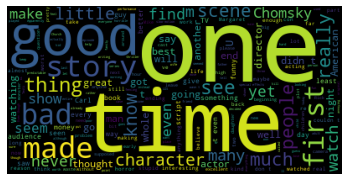

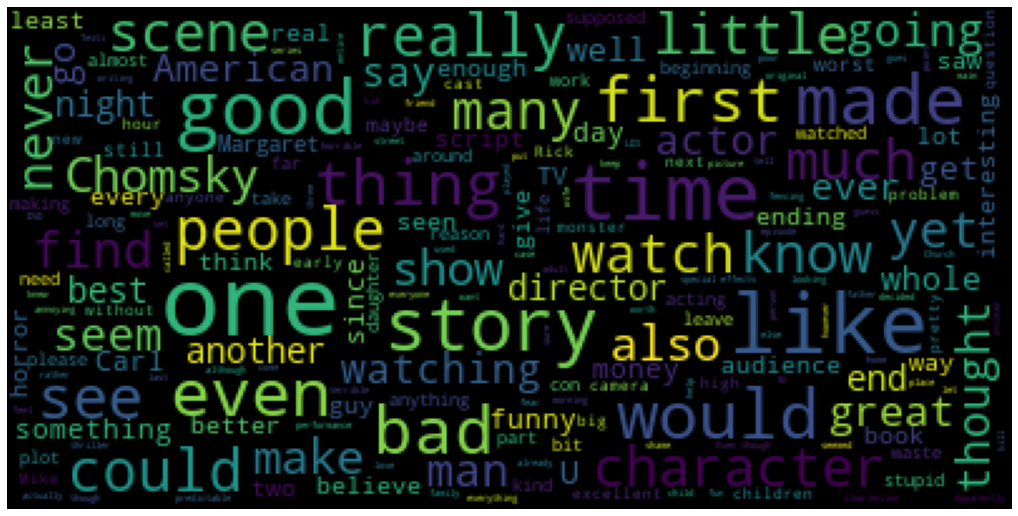

In [11]:
new_negative_reviews = []
more_remove_words_neg = ['movies', 'S', 'movie', 'film', 'films', 's']
for review in negative_reviews:
    x = review.split()
    new_negative_reviews.append(" ".join(a if a not in more_remove_words_neg else '' for a in x))
wordcloud = WordCloud().generate(str(new_negative_reviews))
more_stopwords = set(('cant', 'aint', 'today', 'food', 'got', 'size', 'back', 'movies', 'movie'))
extra_stoplist = set(stopwords.words('english')) | more_stopwords

print()
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud)
plt.axis("off")

# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(max_font_size=40, relative_scaling=.5, stopwords=extra_stoplist).generate(str(new_negative_reviews))
plt.figure(figsize=(18,18))
plt.imshow(wordcloud)
plt.axis("off")

## Which method seem to be working better?

For this dataset, vaderSentiment seem to be the best way to analyse the dataset. 